## Classification Bake-off:

The goal of this bake off if for students to practice the data science process and handling . Through this process, you will need to clean and prepare the data, engineer features, fit didfferent models, tune the hyperparameters of those models, and account for how any class imbalance can affect your model. 

## Data Set Information:

This dataset contains information about customers' credit card default payments in Taiwan. It was taken from a study that compares the predictive accuracy of probability of default among six data mining methods. This data set is not as clean as some of the data you have previously recieved. Below is all of the information that is given about the different columns of data. As you explore this data you will find that the 'data dictionary' below does not include all of the values that you will find in the actual dataset. You will have to make decisions on your own as to how you will interpret and handle these unknown values.  

## Evaluation:

For this bake-off, we will be scoring the submitted predictions using the F1 score. 


## Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
    - X6 = the repayment status in September, 2005;
    - X7 = the repayment status in August, 2005; . . .;
    - X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar).
    - X18 = amount paid in September, 2005;
    - X19 = amount paid in August, 2005; . . .;
    - X23 = amount paid in April, 2005.

# Import Data

In [202]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns

In [203]:
train_df = pd.read_csv('dataset.csv', index_col='Unnamed: 0')
train_df.shape

(22500, 24)

In [204]:
hold_df = pd.read_csv('validation_set.csv', index_col='Unnamed: 0')
hold_df.shape

(7500, 23)

# Create Features

In [205]:
# Function to rename credit limit, credit default, payment status,
# payment balance and payment amount columns
def rename_cols(df):
    df = df.rename(columns={'LIMIT_BAL': 'CREDIT_LIM', 'default payment next month': 'DEFAULT'})
    df = df.rename(columns={'PAY_0': 'SEP_STS', 'PAY_2': 'AUG_STS', 'PAY_3': 'JUL_STS',
                            'PAY_4': 'JUN_STS', 'PAY_5': 'MAY_STS', 'PAY_6': 'APR_STS'})
    df = df.rename(columns={'BILL_AMT1': 'SEP_BAL', 'BILL_AMT2': 'AUG_BAL', 'BILL_AMT3': 'JUL_BAL',
                            'BILL_AMT4': 'JUN_BAL', 'BILL_AMT5': 'MAY_BAL', 'BILL_AMT6': 'APR_BAL'})
    df = df.rename(columns={'PAY_AMT1': 'SEP_PMT', 'PAY_AMT2': 'AUG_PMT', 'PAY_AMT3': 'JUL_PMT',
                            'PAY_AMT4': 'JUN_PMT', 'PAY_AMT5': 'MAY_PMT', 'PAY_AMT6': 'APR_PMT'})
    return df

train_df = rename_cols(train_df)
hold_df = rename_cols(hold_df)

In [206]:
# Function to turn sex data into male dummy column
def dummies_sex(df):
    filt = df['SEX'] == 1
    df['SEX_M'] = np.where(filt, 1, 0)
    df.drop('SEX', axis=1, inplace=True)
    return df

train_df = dummies_sex(train_df)
hold_df = dummies_sex(hold_df)

In [207]:
# Function to turn education data into dummy columns
def dummies_edu(df):
    df['EDUCATION'] = df['EDUCATION'].map({1: 'GS', 2: 'UNI', 3: 'HS', 4: 'OTH',
                                           0: '0_UNK', 5: '5_UNK', 6: '6_UNK'})
    dummies = pd.get_dummies(df['EDUCATION'], prefix='EDU', drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    df.drop(['EDUCATION', 'EDU_0_UNK'], axis=1, inplace=True)
    return df

train_df = dummies_edu(train_df)
hold_df = dummies_edu(hold_df)

In [208]:
# Function to turn marital status data into dummy columns
def dummies_ms(df):
    df['MARRIAGE'] = df['MARRIAGE'].map({1: 'MAR', 2: 'SGL', 3: 'OTH', 0: '0_UNK'})
    dummies = pd.get_dummies(df['MARRIAGE'], prefix='MS', drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    df.drop(['MARRIAGE', 'MS_0_UNK'], axis=1, inplace=True)
    return df

train_df = dummies_ms(train_df)
hold_df = dummies_ms(hold_df)

In [209]:
# Function to turn duly paid data into dummy columns
def dummies_paid(df):
    filt_1 = df['SEP_STS'] == -1
    filt_2 = df['SEP_STS'] == -2
    df['SEP_PAID'] = np.where()
    df.drop(['MARRIAGE', 'MS_0_UNK'], axis=1, inplace=True)
    df['SEP_STS'] = df['SEP_STS'].map({-1: 0, -2: 0})
    return df

In [210]:
# # Function to add 0 values for any missing columns in two dataframes
# def compare_cols(df1, df2):
#     for col in df1:
#         if col in df2:
#             pass
#         else:
#             df2[col] = 0
#     for col in df2:
#         if col in df1:
#             pass
#         else:
#             df1[col] = 0
#     return df1, df2

# train_df, hold_df = compare_cols(train_df, hold_df)

In [211]:
bal_unqs = dict(SEP_STS = train_df['SEP_BAL'].unique(),
                AUG_STS = train_df['AUG_BAL'].unique(),
                JUL_STS = train_df['JUL_BAL'].unique(),
                JUN_STS = train_df['JUN_BAL'].unique(),
                MAY_STS = train_df['MAY_BAL'].unique(),
                APR_STS = train_df['APR_BAL'].unique())

bal_unqs

{'SEP_STS': array([140327,      0,   2937, ...,  21956,  48688, 202010]),
 'AUG_STS': array([143137,      0,   5696, ..., 101878,  50658, 103124]),
 'JUL_STS': array([145374,      0,   4144, ...,  20475,  48999, 105226]),
 'JUN_STS': array([147273,      0,   8168, ...,   7732,  17081, 107476]),
 'MAY_STS': array([149244,      0,   6894, ...,  37746,  48853, 109746]),
 'APR_STS': array([151973,      0,  11424, ...,  20662,  47765, 111920])}

In [212]:
bal_cnts = dict(SEP_STS = train_df['SEP_BAL'].value_counts(),
                AUG_STS = train_df['AUG_BAL'].value_counts(),
                JUL_STS = train_df['JUL_BAL'].value_counts(),
                JUN_STS = train_df['JUN_BAL'].value_counts(),
                MAY_STS = train_df['MAY_BAL'].value_counts(),
                APR_STS = train_df['APR_BAL'].value_counts())

bal_cnts

{'SEP_STS': 0         1505
 390        189
 780         61
 326         53
 316         52
           ... 
 152240       1
 9172         1
 41646        1
 45740        1
 223147       1
 Name: SEP_BAL, Length: 17622, dtype: int64,
 'AUG_STS':  0         1881
  390        181
  316         59
  326         55
  780         52
            ... 
  261286       1
 -7334         1
  27812        1
  3871         1
  18497        1
 Name: AUG_BAL, Length: 17332, dtype: int64,
 'JUL_STS': 0        2162
 390       202
 780        58
 316        47
 326        46
          ... 
 3850        1
 98093       1
 46705       1
 99562       1
 20430       1
 Name: JUL_BAL, Length: 17082, dtype: int64,
 'JUN_STS': 0        2405
 390       192
 780        73
 316        53
 326        42
          ... 
 49826       1
 55969       1
 15005       1
 39577       1
 61434       1
 Name: JUN_BAL, Length: 16762, dtype: int64,
 'MAY_STS': 0         2598
 390        180
 780         68
 316         65
 150    

In [213]:
sts_unqs = dict(SEP_STS = train_df['SEP_STS'].unique(),
                AUG_STS = train_df['AUG_STS'].unique(),
                JUL_STS = train_df['JUL_STS'].unique(),
                JUN_STS = train_df['JUN_STS'].unique(),
                MAY_STS = train_df['MAY_STS'].unique(),
                APR_STS = train_df['APR_STS'].unique())

sts_unqs

{'SEP_STS': array([ 2, -2,  0, -1,  1,  3,  8,  5,  4,  6,  7]),
 'AUG_STS': array([ 2, -2,  0, -1,  3,  4,  7,  1,  5,  6]),
 'JUL_STS': array([ 2, -2,  0, -1,  3,  6,  4,  7,  8,  5,  1]),
 'JUN_STS': array([ 2, -2,  0, -1,  3,  5,  7,  8,  4,  6,  1]),
 'MAY_STS': array([ 2, -2,  0, -1,  3,  4,  7,  8,  5,  6]),
 'APR_STS': array([ 2, -2,  0, -1,  3,  5,  7,  6,  8,  4])}

In [214]:
sts_cnts = dict(SEP_STS = train_df['SEP_STS'].value_counts(),
                AUG_STS = train_df['AUG_STS'].value_counts(),
                JUL_STS = train_df['JUL_STS'].value_counts(),
                JUN_STS = train_df['JUN_STS'].value_counts(),
                MAY_STS = train_df['MAY_STS'].value_counts(),
                APR_STS = train_df['APR_STS'].value_counts())

sts_cnts

{'SEP_STS':  0    11071
 -1     4283
  1     2759
 -2     2036
  2     1999
  3      251
  4       56
  5       17
  8       13
  6       10
  7        5
 Name: SEP_STS, dtype: int64,
 'AUG_STS':  0    11801
 -1     4587
  2     2946
 -2     2798
  3      239
  4       73
  5       19
  1       18
  7       13
  6        6
 Name: AUG_STS, dtype: int64,
 'JUL_STS':  0    11830
 -1     4490
 -2     3037
  2     2847
  3      183
  4       59
  7       24
  6       16
  5       10
  8        2
  1        2
 Name: JUL_STS, dtype: int64,
 'JUN_STS':  0    12383
 -1     4252
 -2     3253
  2     2352
  3      135
  4       48
  7       45
  5       27
  6        3
  8        1
  1        1
 Name: JUN_STS, dtype: int64,
 'MAY_STS':  0    12760
 -1     4149
 -2     3394
  2     1931
  3      143
  4       62
  7       45
  5       12
  6        3
  8        1
 Name: MAY_STS, dtype: int64,
 'APR_STS':  0    12249
 -1     4320
 -2     3634
  2     2064
  3      133
  4       39
  7       34
  6 

In [177]:
filt = train_df['SEP_STS'] == 0
test = train_df[filt]
test.head()

,CREDIT_LIM,AGE,SEP_STS,AUG_STS,JUL_STS,JUN_STS,MAY_STS,APR_STS,SEP_BAL,AUG_BAL,...,SEX_M,EDU_5_UNK,EDU_6_UNK,EDU_GS,EDU_HS,EDU_OTH,EDU_UNI,MS_MAR,MS_OTH,MS_SGL
2,20000,28,0,0,2,0,0,0,2937,5696,...,0,0,0,0,0,0,1,0,0,1
3,50000,23,0,0,0,-1,0,0,51274,50474,...,1,0,0,0,0,0,1,0,0,1
5,400000,44,0,0,0,0,0,0,6902,7904,...,1,0,0,0,0,0,1,0,0,1
6,70000,22,0,-1,0,0,0,0,9232,68209,...,0,0,0,0,0,0,1,0,0,1
7,170000,38,0,0,0,0,0,-1,157174,139101,...,1,0,0,0,0,0,1,1,0,0


In [167]:
filt = train_df['DEFAULT'] == 1
test = train_df[filt]
test.head()

,CREDIT_LIM,AGE,SEP_STS,AUG_STS,JUL_STS,JUN_STS,MAY_STS,APR_STS,SEP_BAL,AUG_BAL,...,SEX_M,EDU_5_UNK,EDU_6_UNK,EDU_GS,EDU_HS,EDU_OTH,EDU_UNI,MS_MAR,MS_OTH,MS_SGL
2,20000,28,0,0,2,0,0,0,2937,5696,...,0,0,0,0,0,0,1,0,0,1
17,230000,30,0,0,0,0,0,0,1873,2778,...,0,0,0,0,1,0,0,0,0,1
20,80000,27,0,0,0,0,0,0,54184,24393,...,0,0,0,0,1,0,0,0,0,1
21,50000,50,0,0,2,0,0,0,47405,50138,...,0,0,0,0,1,0,0,0,0,1
25,50000,22,0,0,0,0,0,0,46687,47831,...,0,0,0,0,1,0,0,0,0,1


In [178]:
tst_cols = dict(SEP_STS = test['SEP_STS'].value_counts(),
                AUG_STS = test['AUG_STS'].value_counts(),
                JUL_STS = test['JUL_STS'].value_counts(),
                JUN_STS = test['JUN_STS'].value_counts(),
                MAY_STS = test['MAY_STS'].value_counts(),
                APR_STS = test['APR_STS'].value_counts())
tst_cols

{'SEP_STS': 0    11071
 Name: SEP_STS, dtype: int64,
 'AUG_STS':  0    10721
 -1      350
 Name: AUG_STS, dtype: int64,
 'JUL_STS':  0    9661
  2     633
 -1     580
 -2     172
  3      21
  4       4
 Name: JUL_STS, dtype: int64,
 'JUN_STS':  0    9365
 -1     676
  2     668
 -2     333
  3      24
  4       4
  5       1
 Name: JUN_STS, dtype: int64,
 'MAY_STS':  0    9207
 -1     808
  2     552
 -2     471
  3      24
  4       6
  5       2
  7       1
 Name: MAY_STS, dtype: int64,
 'APR_STS':  0    8835
 -1     874
  2     679
 -2     652
  3      21
  4       5
  6       4
  5       1
 Name: APR_STS, dtype: int64}

# EDA

In [170]:
# Percentage of borrowers who defaulted
dft_pct = len(train_df[train_df['DEFAULT'] == 1])/len(train_df)
dft_pct

0.2212

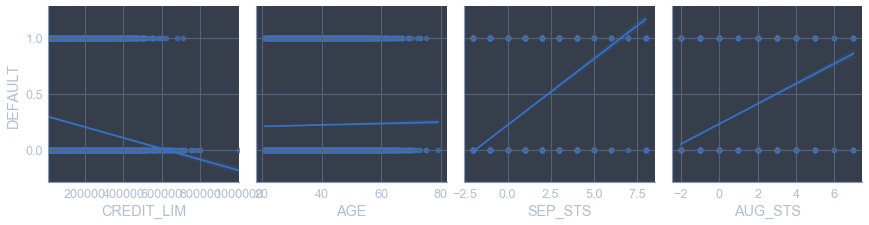

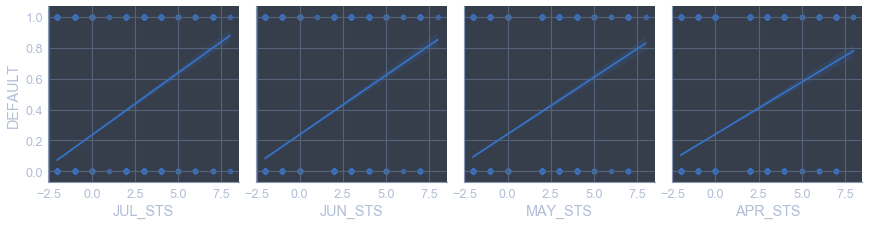

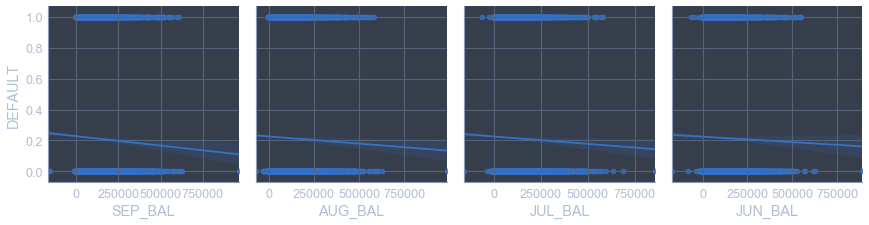

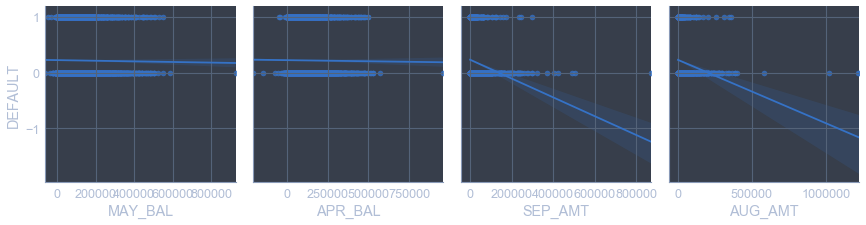

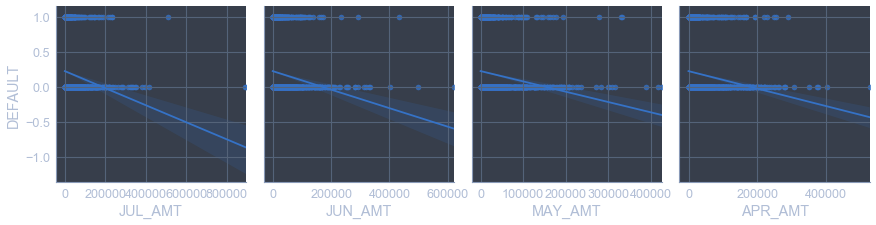

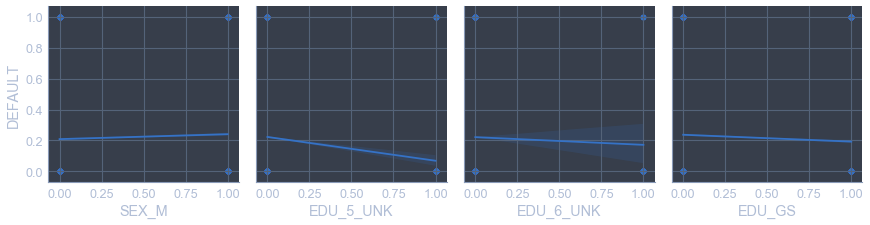

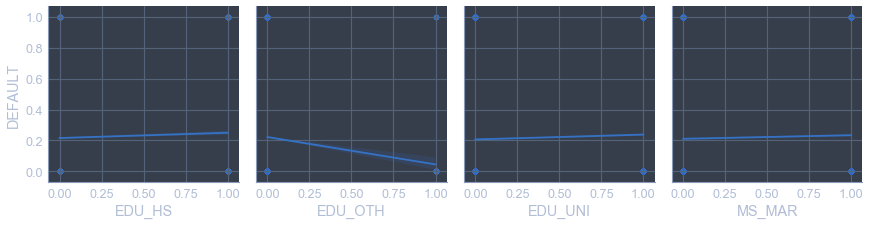

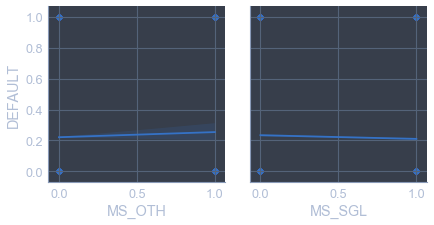

In [173]:
# Function to create feature pplots
def pplot_features(df, features):
    pp_rows = [features[i:i+4] for i in range(0, len(features), 4)]
    for row in pp_rows:
        pp = sns.pairplot(data=df, y_vars=['DEFAULT'], x_vars=row, kind='reg', height=3)
    return None

pplot_features(train_df, train_df.drop(columns='DEFAULT').keys())